In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv.zip to IMDB Dataset.csv.zip


In [ ]:
import pandas as pd
data = pd.read_csv("IMDB Dataset.csv.zip")
print(data.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
import re
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

data['cleaned_review'] = data['review'].apply(clean_text)
print(data.head())


                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                      cleaned_review  
0  one of the other reviewers has mentioned that ...  
1  a wonderful little production the filming tech...  
2  i thought this was a wonderful way to spend ti...  
3  basically theres a family where a little boy j...  
4  petter matteis love in the time of money is a ...  


In [ ]:
print(data.info())
print(data.describe())
print(data['sentiment'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          50000 non-null  object
 1   sentiment       50000 non-null  object
 2   cleaned_review  50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB
None
                                                   review sentiment  \
count                                               50000     50000   
unique                                              49582         2   
top     Loved today's show!!! It was a variety and not...  positive   
freq                                                    5     25000   

                                           cleaned_review  
count                                               50000  
unique                                              49580  
top     loved todays show it was a variety and not sol...  
freq                           

In [ ]:
print(data.isnull().sum())
data['review'] = data['review'].fillna('')
data['text_length'] = data['review'].apply(len)

review            0
sentiment         0
cleaned_review    0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['cleaned_review'])
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(f"Accuracy: {clf.score(X_test, y_test)}")


Accuracy: 0.7303


In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.73      0.73      0.73      4961
    positive       0.73      0.73      0.73      5039

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf=LogisticRegression(max_iter=200, solver='liblinear')
clf.fit(X_train_scaled, y_train)
print(f'Accuracy: {clf.score(X_test_scaled, y_test)}')
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


Accuracy: 0.8533
              precision    recall  f1-score   support

    negative       0.86      0.84      0.85      4961
    positive       0.85      0.87      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



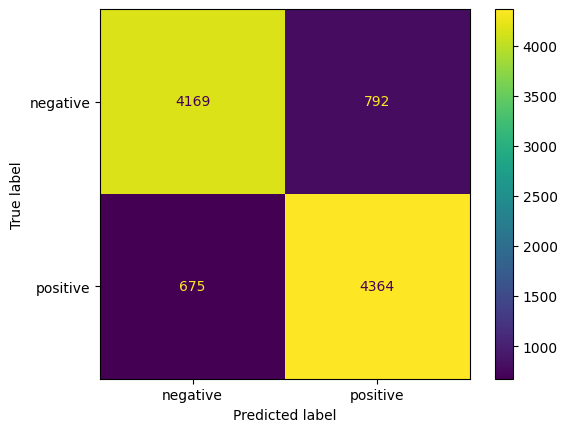

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
